In [64]:
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import folium

In [71]:
SANANDREAS_LATITUDE = 35.1167
SANANDREAS_LONGITUDE = -119.6500

def fetch_earthquake_data():
    base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    params = {
        "format": "geojson",
        'latitude': SANANDREAS_LATITUDE,
        'longitude': SANANDREAS_LONGITUDE,
        'maxradiuskm': 5000,
        "starttime": "2024-11-15",
        "endtime": "2025-09-01",
        "minmagnitude": 1.0,
        "orderby": "time"
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch earthquake data.")
        return None

earthquake_data = fetch_earthquake_data()

In [72]:
def parse_earthquake_data(data):
    earthquakes = []

    for feature in data['features']:
        properties = feature['properties']
        magnitude = properties['mag']
        timestamp = datetime.datetime.fromtimestamp(properties['time'] / 1000.0)

        coordinates = feature['geometry']['coordinates']
        longitude = coordinates[0]
        latitude = coordinates[1]

        earthquakes.append({
            'magnitude': magnitude,
            'timestamp': timestamp,
            'longitude': longitude,
            'latitude': latitude

        })

    return earthquakes

earthquakes = parse_earthquake_data(earthquake_data)

In [73]:
locations = []
for quake in earthquakes:
    location = (quake['latitude'],quake['longitude'])
    locations.append(
        location
    )
locations 


[(33.8035, -116.9028333),
 (19.3241672515869, -155.852828979492),
 (19.4535007476807, -155.735504150391),
 (61.3935, -146.7977),
 (19.3894996643066, -155.246673583984),
 (19.1749992370605, -155.487838745117),
 (64.9589, -149.1677),
 (33.1408333, -115.9628333),
 (35.3863333, -117.7528333),
 (34.0228333, -117.2055),
 (33.6383333, -116.719),
 (28.95, -98.31),
 (38.8230018615723, -122.810997009277),
 (33.1938333, -116.1768333),
 (33.518, -116.7431667),
 (59.1034, -152.4237),
 (60.1823, -151.352),
 (19.3754997253418, -155.173492431641),
 (28.987, -98.336),
 (39.1603, -119.1544),
 (64.889, -148.9542),
 (19.0436668395996, -155.352005004883),
 (31.581, -104.561),
 (59.3534, -153.7353),
 (19.1599998474121, -155.482666015625),
 (19.2653331756592, -155.399169921875),
 (34.025, -118.9451667),
 (39.4809, -119.4514),
 (38.3665008544922, -122.561668395996),
 (48.147, -122.99166666666666),
 (38.8139991760254, -122.761665344238),
 (62.2217, -151.1781),
 (19.3888339996338, -155.246673583984),
 (31.585, 

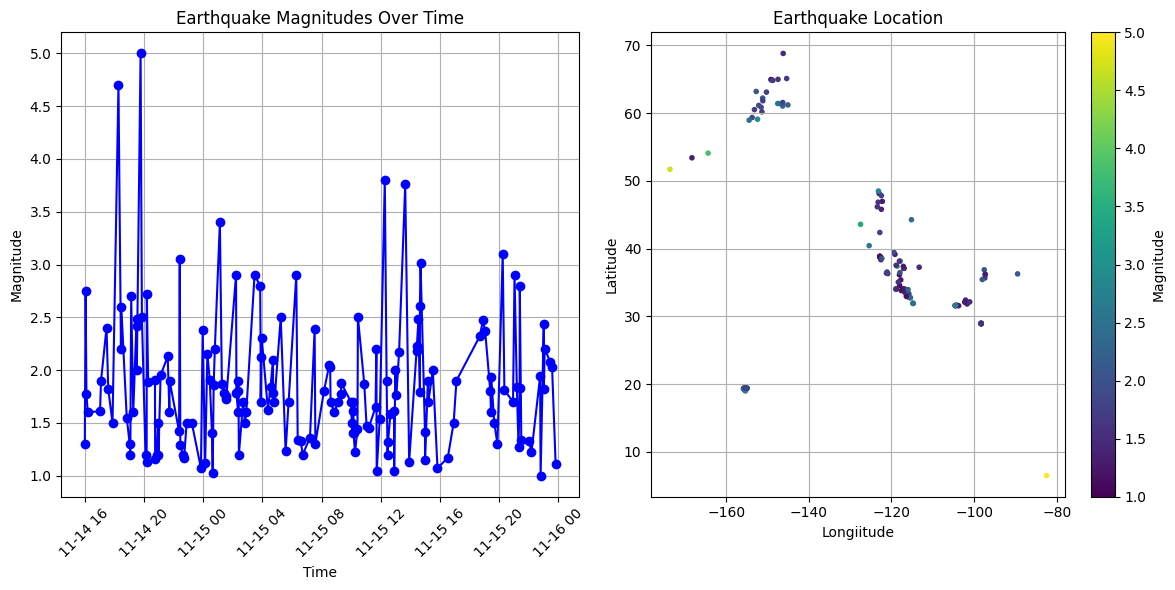

In [74]:
def plot_earthquake_magnitudes(earthquakes):
    timestamps = [quake['timestamp'] for quake in earthquakes]
    magnitudes = [quake['magnitude'] for quake in earthquakes]
    latitude = [quake['latitude'] for quake in earthquakes]
    longitude = [quake['longitude'] for quake in earthquakes]
   

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(timestamps, magnitudes, marker='o', linestyle='-', color='b')
    plt.title('Earthquake Magnitudes Over Time')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xticks(rotation=45)
   
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(longitude, latitude, c=magnitudes, cmap='viridis', marker='.')
    plt.title('Earthquake Location')
    plt.xlabel('Longiitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Magnitude')
    plt.grid(True)

    plt.tight_layout()
    plt.show


plot_earthquake_magnitudes(earthquakes)

In [77]:

mymap = folium.Map(location=[35.0, -118.5], zoom_start=8) 

for lat, lon in locations:
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,      
        color='red',   
        fill=True,      
        fill_color='red',
        fill_opacity=0.8 
    ).add_to(mymap)
mymap